In [1]:
import io
import cv2
import numpy as np
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [47]:
def analyze_points(path, start, end, flag='real2sim_grad'):
    dist_list = []
    E_list = []
    nu_list = []
    if flag == 'real2sim_grad':
        for i in range(start, end):
            with open(f'{path}/{i}/setting4.txt', 'rb') as f:
                setting = f.readlines()[0].decode('utf8').rstrip()
                setting = setting.split(',')
                dist_list.append(float(setting[0]))
                E_list.append(float(setting[4]))
                nu_list.append(float(setting[5]))
        E_mean, E_std = np.mean(E_list), np.std(E_list)
        nu_mean, nu_std = np.mean(nu_list), np.std(nu_list)
        dist_mean, dist_std = np.mean(dist_list), np.std(dist_list)
        print(f'E, {E_mean:.4f}±{E_std:.4f}')
        print(f'nu, {nu_mean:.4f}±{nu_std:.4f}')
        print(f'dist, {dist_mean:.4f}±{dist_std:.4f}')
        return dist_list, E_list, nu_list
    elif flag == 'sim2sim_learning':
        E_loss_list = []
        nu_loss_list = []
        for i in range(start, end):
            with open(f'{path}/{i}.txt', 'rb') as f:
                setting = f.readlines()[0].decode('utf8').rstrip()
                setting = setting.split(',')
                dist_list.append(float(setting[0]))
                E_list.append(float(setting[4]))
                nu_list.append(float(setting[5]))
                E_loss_list.append(np.abs((float(setting[1]) - float(setting[4]))))
                nu_loss_list.append(np.abs((float(setting[2]) - float(setting[5]))))
        E_mean, E_std = np.mean(E_list), np.std(E_list)
        nu_mean, nu_std = np.mean(nu_list), np.std(nu_list)
        dist_mean, dist_std = np.mean(dist_list), np.std(dist_list)
        E_loss_mean, E_loss_std = np.mean(E_loss_list), np.std(E_loss_list)
        nu_loss_mean, nu_loss_std = np.mean(nu_loss_list), np.std(nu_loss_list)
        print(f'E_loss, {E_loss_mean:.4f}±{E_loss_std:.4f}')
        print(f'nu_loss, {nu_loss_mean:.4f}±{nu_loss_std:.4f}')
        print(f'E, {E_mean:.4f}±{E_std:.4f}')
        print(f'nu, {nu_mean:.4f}±{nu_std:.4f}')
        print(f'dist, {dist_mean:.4f}±{dist_std:.4f}')
        return dist_list, E_list, nu_list
    elif flag == 'sim2sim_grad':
        E_loss_list = []
        nu_loss_list = []
        for i in range(start, end):
            with open(f'{path}/{i}/setting.txt', 'rb') as f:
                setting = f.readlines()[0].decode('utf8').rstrip()
                setting = setting.split(',')
                dist_list.append(float(setting[0]))
                E_list.append(float(setting[7]))
                nu_list.append(float(setting[8]))
                E_loss_list.append(np.abs((float(setting[1]) - float(setting[7]))))
                nu_loss_list.append(np.abs((float(setting[2]) - float(setting[8]))))
        E_mean, E_std = np.mean(E_list), np.std(E_list)
        nu_mean, nu_std = np.mean(nu_list), np.std(nu_list)
        dist_mean, dist_std = np.mean(dist_list), np.std(dist_list)
        E_loss_mean, E_loss_std = np.mean(E_loss_list), np.std(E_loss_list)
        nu_loss_mean, nu_loss_std = np.mean(nu_loss_list), np.std(nu_loss_list)
        print(f'E_loss, {E_loss_mean:.4f}±{E_loss_std:.4f}')
        print(f'nu_loss, {nu_loss_mean:.4f}±{nu_loss_std:.4f}')
        print(f'E, {E_mean:.4f}±{E_std:.4f}')
        print(f'nu, {nu_mean:.4f}±{nu_std:.4f}')
        print(f'dist, {dist_mean:.4f}±{dist_std:.4f}')
        return dist_list, E_list, nu_list


In [48]:
print('red--------------')
dist_list, E_list, nu_list = analyze_points('/root/real2sim/real2sim/real_points/red/2023-05-21 02_15_29.987034', 2000, 2008, 'real2sim_grad')
print('white--------------')
dist_list, E_list, nu_list = analyze_points('/root/real2sim/real2sim/real_points/white/2023-05-21 02_15_33.014992', 2000, 2008, 'real2sim_grad')
print('yellow--------------')
dist_list, E_list, nu_list = analyze_points('/root/real2sim/real2sim/real_points/yellow/2023-05-20 18:30:10.182365', 2000, 2008, 'real2sim_grad')


red--------------
E, 1779.3772±7.2369
nu, 0.3508±0.0383
dist, 0.0343±0.0001
white--------------
E, 3274.3974±3.7203
nu, 0.3460±0.0333
dist, 0.0589±0.0001
yellow--------------
E, 8000.3056±48.0375
nu, 0.3596±0.0355
dist, 0.0532±0.0001


In [49]:
print('sim2sim learning--------------')
dist_list, E_list, nu_list = analyze_points('/root/real2sim/sim2sim/log/Move_500_10500_0.2_0.4_200_200/2023-05-21_03-07/2023-05-21_03-38/evaluation', 2000, 2010, 'sim2sim_learning')
print('sim2sim grad--------------')
dist_list, E_list, nu_list = analyze_points('/root/real2sim/sim2sim/output/sum', 2000, 2010, 'sim2sim_grad')



sim2sim learning--------------
E_loss, 300.8053±254.8690
nu_loss, 0.0370±0.0236
E, 4661.4089±2366.9008
nu, 0.3382±0.0400
dist, 0.0032±0.0018
sim2sim grad--------------
E_loss, 11.3673±7.3139
nu_loss, 0.0045±0.0069
E, 4369.5699±2135.1620
nu, 0.3044±0.0642
dist, 0.0003±0.0004


In [50]:
red = np.load('/root/real2sim/real2sim/real_points/red/real_pcds_modify.npy', allow_pickle=True)[-1]
white = np.load('/root/real2sim/real2sim/real_points/white/real_pcds_modify.npy', allow_pickle=True)[-1]
yellow = np.load('/root/real2sim/real2sim/real_points/yellow/real_pcds_modify.npy', allow_pickle=True)[-1]

print(red.shape, white.shape, yellow.shape)

(117, 3) (152, 3) (163, 3)


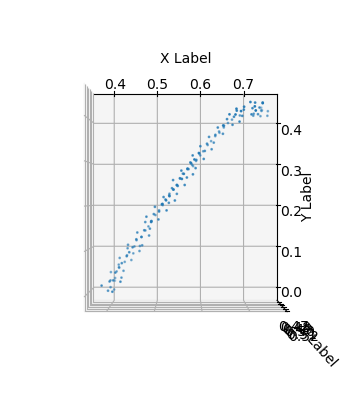

In [51]:
pcds = white
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.view_init(90, -90)
ax1.set_xlabel('X Label')
ax1.set_ylabel('Y Label')
ax1.set_zlabel('Z Label')
ax1.scatter(pcds[:, 0], pcds[:, 1], pcds[:, 2], s=1)